In [67]:
import pandas as pd
import pypsa
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15, 8)

In [15]:
path_soc_bids = 'D:\Python\PyPSA\Luca/nodal_zonal_model\hydro\hpc_results\last_results/4months/bids\soc_nodal_1y_bids_shadows_07_h1.csv'
path_soc_bids_n = 'D:\Python\PyPSA\Luca/nodal_zonal_model\hydro\hpc_results\last_results/4months/bids\soc_nodal_1y_bids_nodalShadows_07_h1.csv'
df = pd.read_csv(path_soc_bids,index_col=0)
df_n = pd.read_csv(path_soc_bids_n,index_col=0)
df = df.dropna()
df_n = df_n.dropna()

In [ ]:
path_soc_60 = 'D:\Python\PyPSA\Luca/nodal_zonal_model\hydro\hpc_results\last_results/4months/bids\soc_nodal_1y_bids_60_07_h1.csv'
df6 = pd.read_csv(path_soc_60,index_col=0)
df6 = df6.dropna()

In [33]:
path_soc_z = 'D:\Python\PyPSA\Luca/nodal_zonal_model\hydro\hpc_results\last_results/4months/bids\soc_zonal_2018_4m.csv'
dfz = pd.read_csv(path_soc_z,index_col=0)
dfz = dfz.dropna()

In [12]:
df.sum(axis=1)

snapshot
2018-06-01 00:00:00    2.134148e+08
2018-06-01 01:00:00    2.134228e+08
2018-06-01 02:00:00    2.133639e+08
2018-06-01 03:00:00    2.133354e+08
2018-06-01 04:00:00    2.132645e+08
                           ...     
2018-09-30 19:00:00    2.131568e+08
2018-09-30 20:00:00    2.131962e+08
2018-09-30 21:00:00    2.132369e+08
2018-09-30 22:00:00    2.132784e+08
2018-09-30 23:00:00    2.133213e+08
Length: 2928, dtype: float64

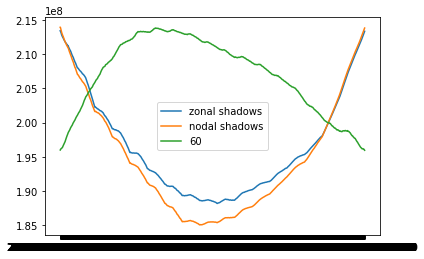

In [35]:
plt.plot(df.sum(axis=1))
plt.plot(df_n.sum(axis=1))
#plt.plot(df6.sum(axis=1))
plt.plot(dfz.sum(axis=1))
plt.legend(['zonal shadows','nodal shadows','60','zonal input'])
plt.show()

In [21]:
path_prices_z = 'D:\Python\PyPSA\Luca/nodal_zonal_model\hydro\hpc_results\last_results/4months/bids\shadow_prices/shadows_of_soc_constraint_zonal.csv'
path_prices_n = 'D:\Python\PyPSA\Luca/nodal_zonal_model\hydro\hpc_results\last_results/4months/bids\shadow_prices/shadows_of_soc_constraint_nodal.csv'
p_z = pd.read_csv(path_prices_z,index_col=0)
p_n = pd.read_csv(path_prices_n,index_col=0)
p_z = p_z.dropna()
p_n = p_n.dropna()

In [26]:
((p_z-p_n).mean()).mean()

9.383224570420044

In [28]:
p_z.mean().mean()

32.36390685982011

In [36]:
path_network = 'D:\\Python\PyPSA\\Luca\\zonal_nodal_networks\\2018\\nodal_1024_costs2018.nc'
n = pypsa.Network(path_network)

INFO:pypsa.io:Imported network nodal_1024_costs2018.nc has buses, carriers, generators, lines, links, loads, storage_units


In [40]:
cap = n.storage_units.max_hours*n.storage_units.p_nom

In [43]:
cap.sum()

214673418.09730995

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

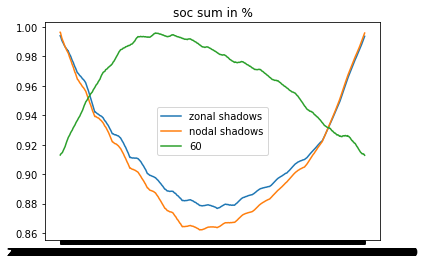

In [44]:
plt.plot(df.sum(axis=1)/cap.sum())
plt.plot(df_n.sum(axis=1)/cap.sum())
#plt.plot(df6.sum(axis=1)/cap.sum())
plt.plot(dfz.sum(axis=1)/cap.sum())
plt.legend(['zonal shadows','nodal shadows','zonal input'])
plt.title('soc sum in %')
plt.show()


In [65]:
path_soc_20 = 'D:\Python\PyPSA\Luca/nodal_zonal_model\hydro\hpc_results\last_results/4months/soc\soc_nodal_1y_05_pen20_4m.csv'
soc20 = pd.read_csv(path_soc_20,index_col=0)
soc20 = soc20.dropna()
# drop first row because starts at hour0
soc20 = soc20.tail(soc20.shape[0]-1)
path_soc_z = 'D:\Python\PyPSA\Luca/nodal_zonal_model\hydro\hpc_results\last_results/4months/soc\soc_zonal_2018_4m.csv'
socz = pd.read_csv(path_soc_z,index_col=0)
socz = socz.dropna()
# drop first row because starts at hour0
socz = socz.tail(socz.shape[0]-1)
path_soc_n = 'D:\Python\PyPSA\Luca/nodal_zonal_model\hydro\hpc_results\last_results/4months/soc\soc_nodal_1y_05_nodal_4m.csv'
socn = pd.read_csv(path_soc_n,index_col=0)
socn = socn.dropna()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

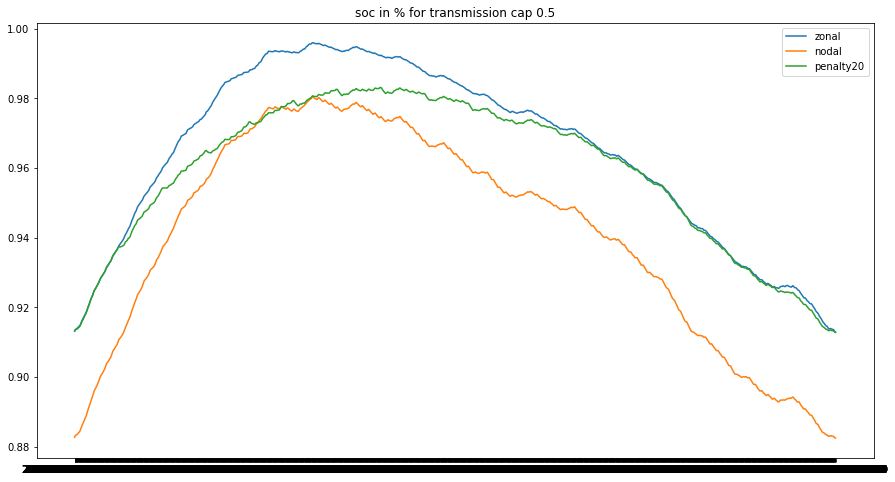

In [68]:
plt.plot(socz.sum(axis=1)/cap.sum())
plt.plot(socn.sum(axis=1)/cap.sum())
plt.plot(soc20.sum(axis=1)/cap.sum())
plt.legend(['zonal','nodal','penalty20'])
plt.title('soc in % for transmission cap 0.5')
plt.show()

In [84]:
# check if there is any below 0.3 soc in 20
((socz/cap)<0.2999).sum().sum()

0

In [86]:
path_n = 'D:\Python\PyPSA\Luca/nodal_zonal_model\hydro\hpc_results\last_results/4months/networks/network_merged_nodal_05_h1.nc'
n = pypsa.Network(path_n)

INFO:pypsa.io:Imported network network_merged_nodal_05_h1.nc has buses, carriers, generators, lines, links, loads, storage_units


In [87]:
path_20 = 'D:\Python\PyPSA\Luca/nodal_zonal_model\hydro\hpc_results\last_results/4months/networks/network_merged_penalty20_05_h1.nc'
n20 = pypsa.Network(path_20)

INFO:pypsa.io:Imported network network_merged_penalty20_05_h1.nc has buses, carriers, generators, lines, links, loads, storage_units


In [96]:
period_start = "2018-06-01"
period_end = "2018-09-30"
time_start = '{} 01:00:00'.format(period_start)
time_end = '{} 23:00:00'.format(period_end)
timespan = pd.date_range(start=time_start, end=time_end, freq='H')

In [134]:
def get_costs(n,timespan):
    # get amount of hydro
    ps = n.storage_units_t.p.loc[timespan,:]
    p_dis = ps[ps>0].sum().sum()
    print(p_dis)
    p_sto = ps[ps<0].sum().sum()
    print(p_sto)
    # get costs of gen from hydro
    hydro_cost = n.storage_units.marginal_cost*p_dis
    # get costs of gen
    gen_costs_lis = []
    for gen in n.generators_t.p.loc[timespan]:
        gen_costs_lis.append((n.generators_t.p.loc[timespan,gen]*n.generators.marginal_cost[gen]).sum())
    tot_costs = hydro_cost.sum()+sum(gen_costs_lis)
    return tot_costs#hydro_cost,sum(gen_costs_lis)

In [123]:
hydro_n,gen_n = get_costs(n)


In [124]:
hydro_20,gen_20 = get_costs(n20)


In [126]:
hydro_20.sum()

140519940165.4084

In [127]:
hydro_n.sum()


139075122587.37402

In [128]:
gen_n


25263684262.114212

In [129]:
gen_20

25040886792.756397

In [132]:
hydro_20.sum()+gen_20
(hydro_n.sum()+gen_n)

164338806849.48822

In [135]:
cos = get_costs(n,timespan)


117066601.5045236
-1394909.2673188448
